In [1]:
import pandas as pd
import matplotlib.pyplot
import seaborn as sns
%matplotlib inline
sns.set()

In [31]:
session_df = pd.read_parquet("output/ifood/dataset/session")
restaurant_df = pd.read_csv("output/ifood/dataset/restaurants_with_contents.csv")

# Análise Exploratória dos Dados

## Interações

### Geral

Quantidade de interações:

In [131]:
num_interactions = len(session_df)
num_interactions

7255085

Quantidade de compras:

In [132]:
num_buys = len(session_df[session_df.buy == 1])
"%d (%.2f%%)" % (num_buys, (num_buys / num_interactions * 100))

'1603324 (22.10%)'

## Contas

### Geral

Quantidade de contas:

In [66]:
num_accounts = session_df.account_id.nunique()
num_accounts

262219

### Compras

Quantidade de contas com alguma compra:

In [72]:
num_buying_accounts = session_df[session_df.buy == 1].account_id.nunique()
"%d (%.2f%%)" % (num_buying_accounts, (num_buying_accounts / num_accounts * 100))

'95506 (36.42%)'

Quantidade de contas com mais de 2 compras:

In [73]:
buys_per_account = session_df.groupby("account_id")["buy"].sum()
num_accounts_2_buys = len(buys_per_account[buys_per_account >= 2])
"%d (%.2f%%)" % (num_accounts_2_buys, (num_accounts_2_buys / num_accounts * 100))

'79542 (30.33%)'

Quantidade de contas com mais de 3 compras:

In [74]:
num_accounts_3_buys = len(buys_per_account[buys_per_account >= 3])
"%d (%.2f%%)" % (num_accounts_3_buys, (num_accounts_3_buys / num_accounts * 100))

'66273 (25.27%)'

Quantidade de contas com mais de 4 compras:

In [75]:
num_accounts_4_buys = len(buys_per_account[buys_per_account >= 4])
"%d (%.2f%%)" % (num_accounts_4_buys, (num_accounts_4_buys / num_accounts * 100))

'57141 (21.79%)'

Quantidade de contas com mais de 5 compras:

In [76]:
num_accounts_5_buys = len(buys_per_account[buys_per_account >= 5])
"%d (%.2f%%)" % (num_accounts_5_buys, (num_accounts_5_buys / num_accounts * 100))

'49769 (18.98%)'

Distribuição de compras por conta:

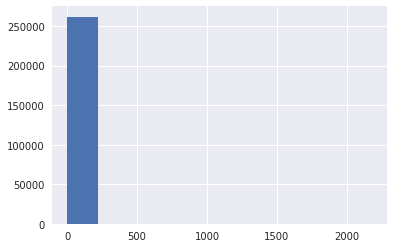

In [70]:
buys_per_account.hist()

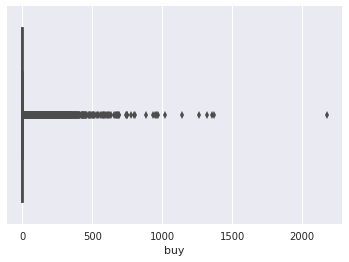

In [53]:
sns.boxplot(buys_per_account)

In [71]:
buys_per_account.describe()

count    262219.000000
mean          5.401843
std          22.371785
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        2177.000000
Name: buy, dtype: float64

Distribuição de compras por conta, considerando apenas contas com pelo menos uma compra:

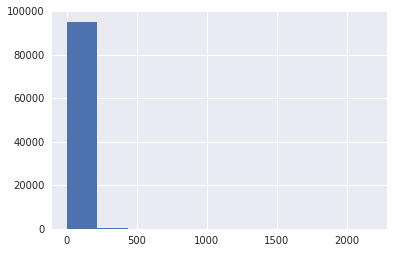

In [77]:
buys_per_buying_account = session_df[session_df.buy == 1].groupby("account_id")["buy"].sum()
buys_per_buying_account.hist()

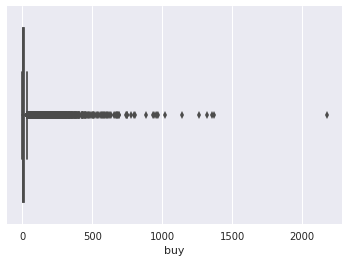

In [78]:
sns.boxplot(buys_per_buying_account)

In [79]:
buys_per_buying_account.describe()

count    95506.000000
mean        14.831173
std         35.132772
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max       2177.000000
Name: buy, dtype: float64

Distribuição de compras por conta, considerando apenas contas com pelo menos uma compra e desconsiderando outliers:

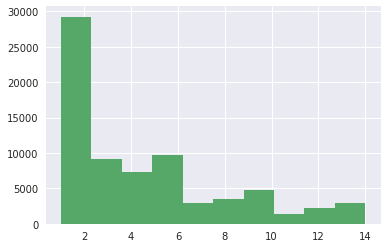

In [80]:
buys_per_buying_account[buys_per_buying_account <= 14].hist()
buys_per_session.hist()

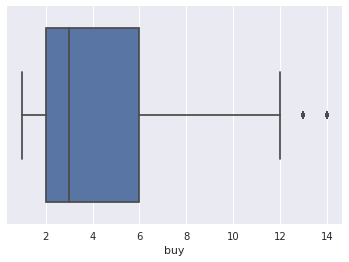

In [81]:
sns.boxplot(buys_per_buying_account[buys_per_buying_account <= 14])

In [82]:
buys_per_buying_account[buys_per_buying_account <= 14].describe()

count    73368.000000
mean         4.496811
std          3.550333
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         14.000000
Name: buy, dtype: float64

### Visitas

Distribuição de visitas por conta:

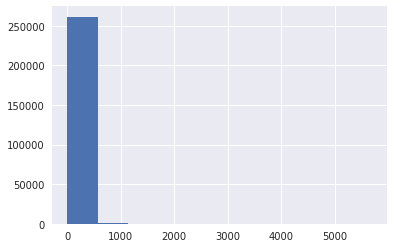

In [83]:
visits_per_account = session_df.groupby("account_id")["session_id"].count()
visits_per_account.hist()

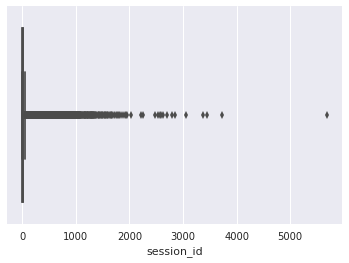

In [84]:
sns.boxplot(visits_per_account)

In [85]:
visits_per_account.describe()

count    262219.000000
mean         24.951796
std          69.924968
min           1.000000
25%           2.000000
50%           6.000000
75%          20.000000
max        5683.000000
Name: session_id, dtype: float64

Distribuição de visitas por conta, desconsiderando os outliers:

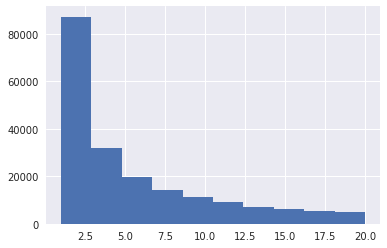

In [86]:
visits_per_account[visits_per_account <= 20].hist()

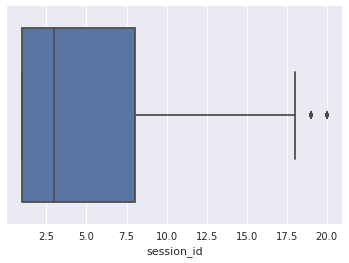

In [87]:
sns.boxplot(visits_per_account[visits_per_account <= 20])

In [88]:
visits_per_account[visits_per_account <= 20].describe()

count    197201.000000
mean          5.288842
std           5.066964
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max          20.000000
Name: session_id, dtype: float64

Distribuição de visitas das contas que fizeram alguma compra:

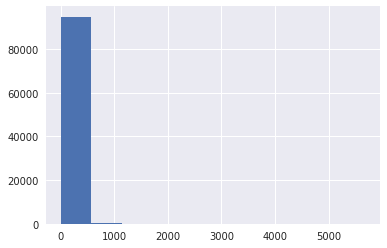

In [89]:
visits_per_buying_account = visits_per_account[buys_per_account >= 1]
visits_per_buying_account.hist()

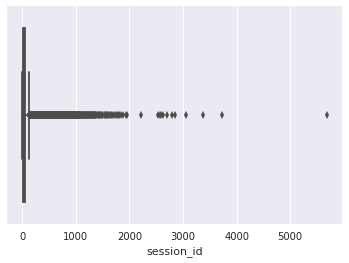

In [90]:
sns.boxplot(visits_per_buying_account)

In [92]:
visits_per_buying_account.describe()

count    95506.000000
mean        53.874772
std        103.774001
min          1.000000
25%          9.000000
50%         23.000000
75%         57.000000
max       5683.000000
Name: session_id, dtype: float64

Distribuição de visitas das contas que fizeram alguma compra, desconsiderando outliers:

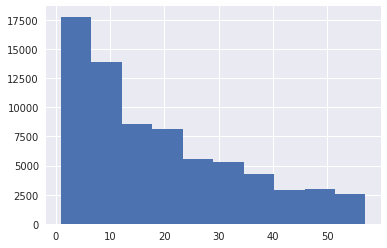

In [93]:
visits_per_buying_account[visits_per_buying_account <= 57].hist()

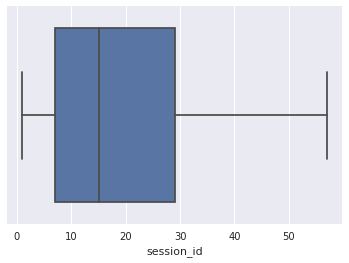

In [94]:
sns.boxplot(visits_per_buying_account[visits_per_buying_account <= 57])

In [95]:
visits_per_buying_account[visits_per_buying_account <= 57].describe()

count    71889.000000
mean        18.940241
std         14.863544
min          1.000000
25%          7.000000
50%         15.000000
75%         29.000000
max         57.000000
Name: session_id, dtype: float64

## Restaurantes

### Geral

Quantidade de restaurantes:

In [102]:
num_restaurants = session_df.merchant_id.nunique()
num_restaurants

1835

Distribuição de restaurantes por tipo de comida:

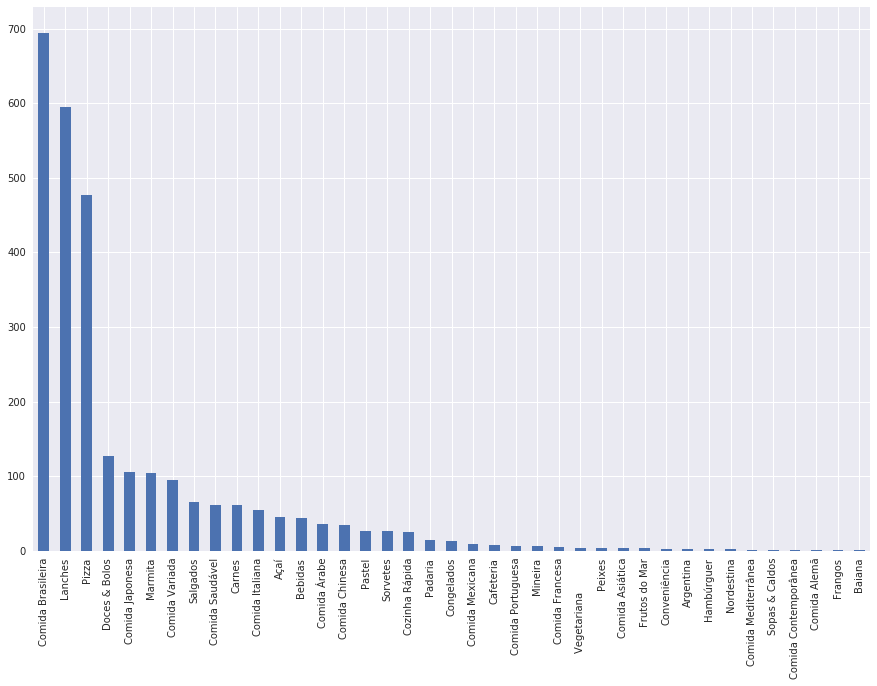

In [101]:
restaurant_df.dish_description.value_counts().plot(kind="bar", figsize=(15, 10))

### Compras

Quantidade de restaurantes com alguma compra:

In [103]:
num_buying_restaurants = session_df[session_df.buy == 1].merchant_id.nunique()
"%d (%.2f%%)" % (num_buying_restaurants, (num_buying_restaurants / num_restaurants * 100))

'1226 (66.81%)'

Quantidade de restaurantes com pelo menos 2 compras:

In [104]:
buys_per_restaurant = session_df.groupby("merchant_id")["buy"].sum()
num_restaurants_2_buys = len(buys_per_restaurant[buys_per_restaurant >= 2])
"%d (%.2f%%)" % (num_restaurants_2_buys, (num_restaurants_2_buys / num_restaurants * 100))

'1211 (65.99%)'

Quantidade de restaurantes com pelo menos 3 compras:

In [105]:
num_restaurants_3_buys = len(buys_per_restaurant[buys_per_restaurant >= 3])
"%d (%.2f%%)" % (num_restaurants_3_buys, (num_restaurants_3_buys / num_restaurants * 100))

'1188 (64.74%)'

Quantidade de restaurantes com pelo menos 4 compras:

In [106]:
num_restaurants_4_buys = len(buys_per_restaurant[buys_per_restaurant >= 4])
"%d (%.2f%%)" % (num_restaurants_4_buys, (num_restaurants_4_buys / num_restaurants * 100))

'1181 (64.36%)'

Quantidade de restaurantes com pelo menos 5 compras:

In [107]:
num_restaurants_5_buys = len(buys_per_restaurant[buys_per_restaurant >= 5])
"%d (%.2f%%)" % (num_restaurants_5_buys, (num_restaurants_5_buys / num_restaurants * 100))

'1168 (63.65%)'

Distribuição de compras por restaurante:

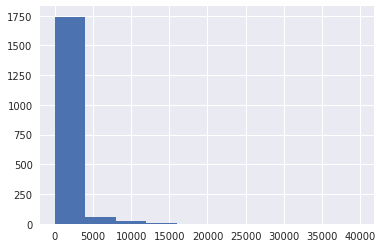

In [108]:
buys_per_restaurant.hist()

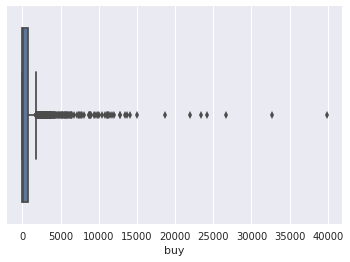

In [109]:
sns.boxplot(buys_per_restaurant)

In [110]:
buys_per_restaurant.describe()

count     1835.000000
mean       873.746049
std       2405.736660
min          0.000000
25%          0.000000
50%         98.000000
75%        692.000000
max      39864.000000
Name: buy, dtype: float64

Distribuição de compras por restaurante, desconsiderando outliers:

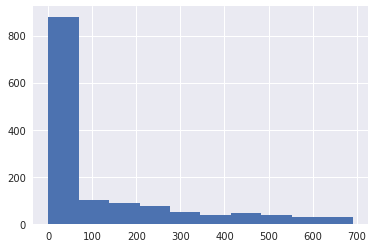

In [111]:
buys_per_restaurant[buys_per_restaurant <= 692].hist()

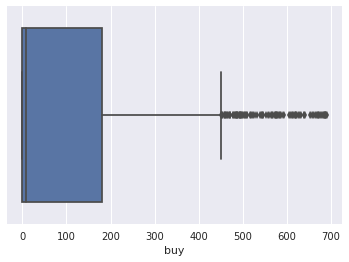

In [112]:
sns.boxplot(buys_per_restaurant[buys_per_restaurant <= 692])

Quantidade de compras por tipo de comida:

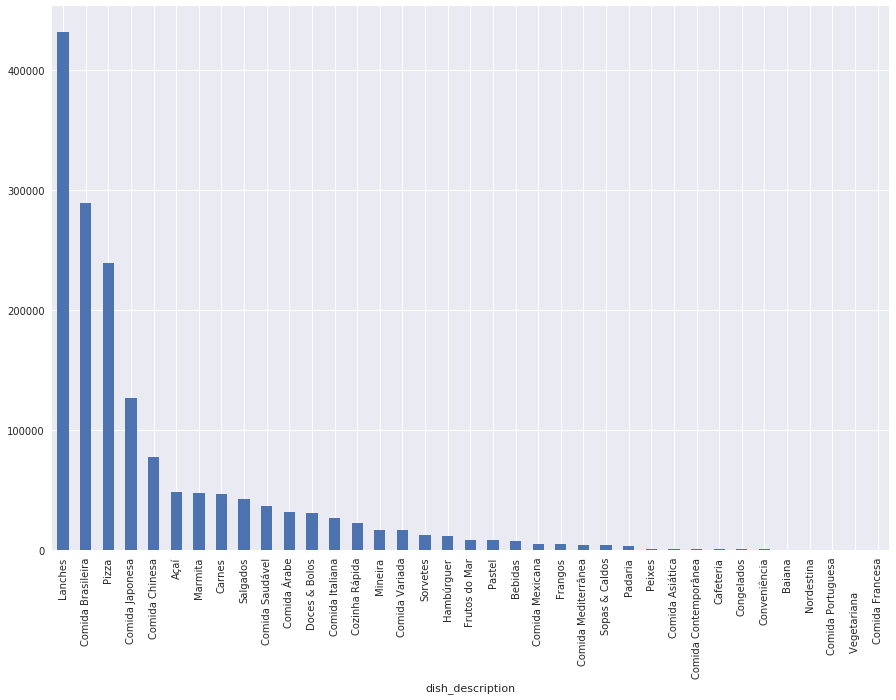

In [122]:
session_with_dish_df = session_df.merge(restaurant_df[["merchant_id", "dish_description"]], on="merchant_id")
buys_per_dish = session_with_dish_df.groupby("dish_description")["buy"].sum()
buys_per_dish.sort_values(ascending=False).plot(kind="bar", figsize=(15, 10))

### Visitas

Distribuição de visitas por restaurante:

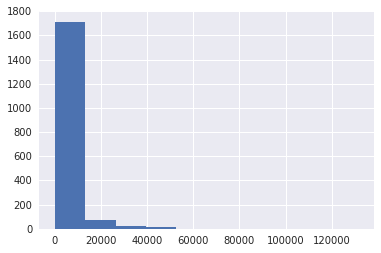

In [123]:
visits_per_restaurant = session_df.groupby("merchant_id")["session_id"].count()
visits_per_restaurant.hist()

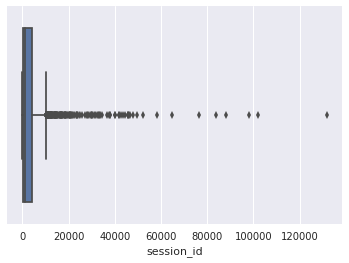

In [124]:
sns.boxplot(visits_per_restaurant)

In [125]:
visits_per_restaurant.describe()

count      1835.000000
mean       3953.724796
std        8704.270866
min           1.000000
25%         107.000000
50%        1088.000000
75%        4172.500000
max      131739.000000
Name: session_id, dtype: float64

Distribuição de visitas por restaurante, desconsiderando outliers:

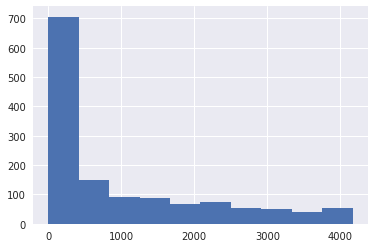

In [127]:
visits_per_restaurant[visits_per_restaurant <= 4173].hist()

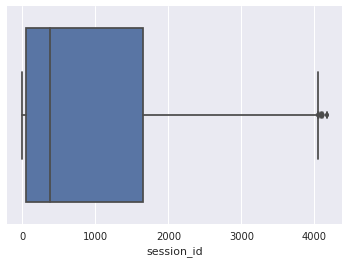

In [128]:
sns.boxplot(visits_per_restaurant[visits_per_restaurant <= 4173])

Quantidade de visitas por tipo de comida:

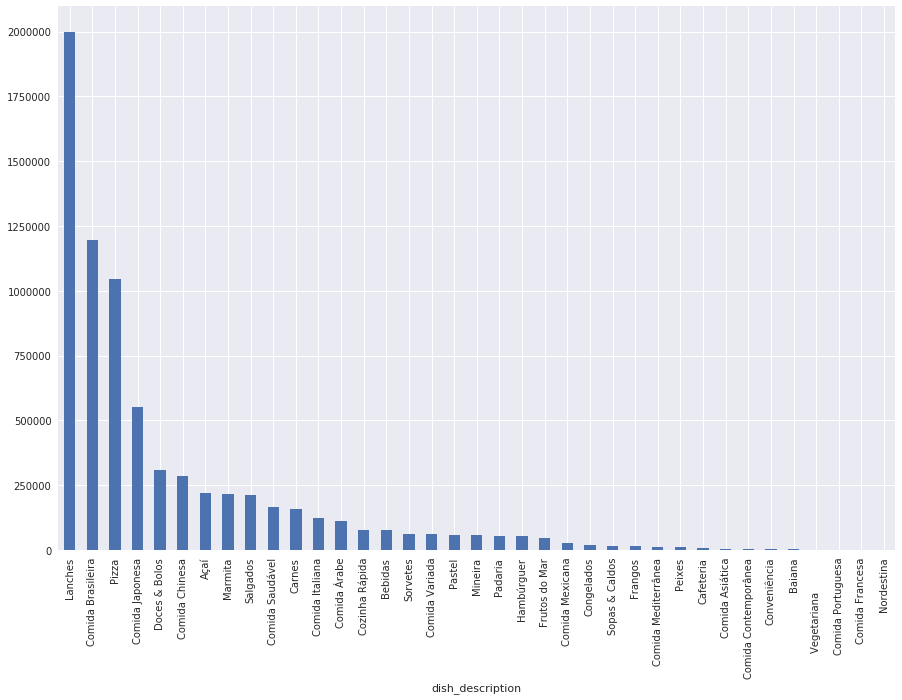

In [133]:
visits_per_dish = session_with_dish_df.groupby("dish_description")["session_id"].count()
visits_per_dish.sort_values(ascending=False).plot(kind="bar", figsize=(15, 10))